# representando texto em formato vetorial

instanciando metodos que fara a representacao do texto usando o modelo bag of word

In [32]:
#from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [33]:
tfidf_matrix = vectorizer.fit_transform(dados_reviews['content'])

palavras = vectorizer.get_feature_names_out()


In [34]:

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=palavras)

tfidf_df

,aap,aba,abaix,abal,abandon,abas,abat,abba,abc,abenço,...,ócul,ódi,óptim,órgã,ótim,ônibus,últim,únic,úte,útil
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.107496,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.107803,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


# treinamento e teste

Aqui vamos estimar a performance do classificador utilizando uma subdivisão nos dados. Vamos dividir os dados (tfidf_df) em um conjunto de teste e outro treinamento. 

In [35]:
textos_tfidf = tfidf_df
categorias = dados_reviews['sentiment'] # as categorias devem estar separadas dos dados de treinamento 
categorias_polaridade = dados_reviews['sentiment_polarity']

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(textos_tfidf, categorias, test_size=0.5, random_state=42) #20% para teste.
X_trainp, X_testp, y_trainp, y_testp = train_test_split(textos_tfidf, categorias_polaridade, test_size=0.5, random_state=42) #20% para teste.

# X_train contém os 80% dos dados - treinamento
# y_train contém os 80% das categorias (atributo alvo) - treinamento

# X_test contém os 20% dos dados - teste
# y_test contém os 20% das categorias - teste

In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knnp = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knnp.fit(X_trainp, y_trainp)
predicoes = knn.predict(X_test)# recebe os 20% dos dados de teste sem as categorias - "escondidas"
predicoesp = knnp.predict(X_testp)

Como sabemos de antemão a categoria correta do conjunto de teste, vamos avaliar a performance do nosso classificador de notícias Bayesiano

In [38]:
from sklearn.metrics import classification_report
import numpy as np

print(classification_report(y_test, predicoes))
#print("Classes em y_test:", np.unique(y_test))
#print("Classes em predicoes:", np.unique(predicoes))
# y_test contém as categorias conhecidas do conjunto de teste usado no método predict().
# predicoes contém as categorias preditas (retornadas) pelo método predict() com base nos dados de X_test.

              precision    recall  f1-score   support

       anger       0.40      0.54      0.46       379
     disgust       0.46      0.50      0.48       476
        fear       0.17      0.05      0.07        22
   happiness       0.55      0.35      0.43       151
     neutral       0.57      0.09      0.16        44
     sadness       0.52      0.44      0.48       430
    surprise       0.00      0.00      0.00         4

    accuracy                           0.46      1506
   macro avg       0.38      0.28      0.30      1506
weighted avg       0.47      0.46      0.45      1506



/home/arthurwsl/classificao_textos/Classificacao_textos/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/arthurwsl/classificao_textos/Classificacao_textos/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/arthurwsl/classificao_textos/Classificacao_textos/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_testp, predicoesp))

# y_test contém as categorias conhecidas do conjunto de teste usado no método predict().
# predicoes contém as categorias preditas (retornadas) pelo método predict() com base nos dados de X_test.

              precision    recall  f1-score   support

    negative       0.76      0.82      0.79       877
     neutral       0.57      0.09      0.16        44
    positive       0.70      0.66      0.68       585

    accuracy                           0.74      1506
   macro avg       0.68      0.52      0.54      1506
weighted avg       0.73      0.74      0.73      1506



Vamos montar a matriz de confusão usando um mapa de valor da biblioteca Seaborn

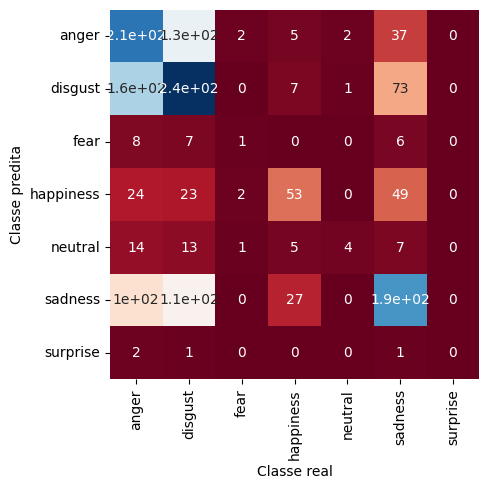

In [51]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

labels = sorted(categorias.unique())

cm = confusion_matrix(y_test, predicoes)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False, 
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()


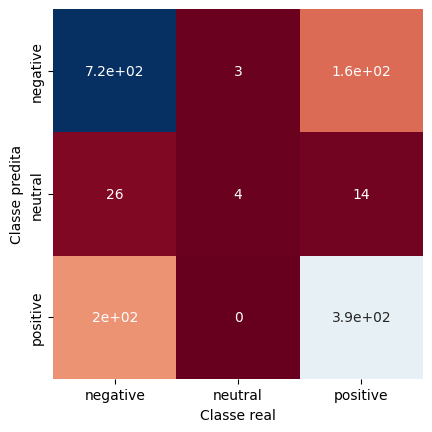

In [54]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_testp, predicoesp)

# Obter os rótulos das classes em ordem
labelsp = sorted(categorias_polaridade.unique())

# Criar o heatmap da matriz de confusão
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False, 
            xticklabels=labelsp,
            yticklabels=labelsp)

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()

# Teste para uma avaliacao nova



In [42]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(textos_tfidf, categorias)

KNeighborsClassifier(n_neighbors=3)

In [43]:
import pandas as pd

teste_emocoes = pd.read_csv('teste.csv', sep = ',', encoding = 'latin-1')
teste_emocoes

,numero,content,sentiment_polarity,sentiment,app
0,1,A última vez que pedi algo por esse app foi re...,negative,disgust,iFood
1,2,"Péssimo suporte, troquei de celular e não tenh...",negative,sadness,iFood
2,3,Gostando muito do nubank! Consegui desenvolver...,positive,happiness,Nubank
3,4,"O melhor navegador que já usei, realmente bloq...",positive,happiness,Brave Mobile
4,5,Uma modificação da maldade. Realmente isso é e...,negative,anger,Figurinhas do Lula - PT
5,6,"O app é muito bom,algumas mercadorias s?o real...",positive,sadness,Shopee
6,7,Estava com problema inicial de n?o conseguir e...,negative,anger,Shopee
7,8,"Pra mim é o Melhor Shopping Online que surgiu,...",positive,happiness,Shopee
8,9,"Serviço de varejo muito bom, o sistema de fret...",positive,happiness,Shopee


In [44]:
teste_emocoes['content'] = teste_emocoes['content'].apply(lambda x: regex.sub(r'[^\p{Latin}]', u' ', str(x)))
teste_emocoes['content'] =teste_emocoes['content'].apply(lambda x: str(x).lower())
teste_emocoes['content'] = teste_emocoes['content'].apply(remove_stopwords)
teste_emocoes['content'] = teste_emocoes['content'].apply(stem_text)
print(teste_emocoes)

   numero                                            content  \
0       1  últim vez ped algo app realment últim pra nunc...   
1       2  péssim suport troqu celul acess númer antig dã...   
2       3  gost nubank consegu desenvolv bom relacion tod...   
3       4  melhor naveg use realment bloqu tod propagand ...   
4       5                modific maldad realment estup idiot   
5       6  app bom algum mercador s realment qualidad pre...   
6       7  problem inicial n consegu envi mensagens chat ...   
7       8  pra mim melhor shopping onlin surg respeit cli...   
8       9  servic varej bom sistem fret ótim funcion bem ...   

  sentiment_polarity  sentiment                      app  
0           negative    disgust                    iFood  
1           negative    sadness                    iFood  
2           positive  happiness                   Nubank  
3           positive  happiness             Brave Mobile  
4           negative      anger  Figurinhas do Lula - PT  
5    

In [45]:
avaliacao_TF_IDF = vectorizer.transform(teste_emocoes['content'])

In [46]:
emocao_predita = knn.predict(avaliacao_TF_IDF)
print('emocao predita:')
print(emocao_predita)
print('emocao real:')
print(list(teste_emocoes['sentiment']))

emocao predita:
['anger' 'disgust' 'happiness' 'disgust' 'disgust' 'disgust' 'disgust'
 'disgust' 'happiness']
emocao real:
['disgust', 'sadness', 'happiness', 'happiness', 'anger', 'sadness', 'anger', 'happiness', 'happiness']


/home/arthurwsl/classificao_textos/Classificacao_textos/myenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
